This lab plays with drawing slope fields with Python. For any first order DE $dy/dt = f(t,y)$, wether it is solvable by analytical methods or not, we can always obtain a lot of information of $dy/dt$ by plotting the right hand side function $f(t,y)$ in a slope field.  

A slope field for $dy/dt = f(t,y)$ is a field of arrows of slope $f(t_i,y_i)$ thru each point $(t_i,y_i)$ on the $ty$-plane.

In [1]:
## import packages 
import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode

We first plot the slope field for the spruce-budworm equation (models population of some pests, with the effect of predation by birds)
$$dy/dt=ry\big(1-\frac{y}{N}\big)-\frac{ay^2}{b^2+y^2}.$$
Here $r,\ N,\ a,\ b$ are parameters, and we take them to be $r=0.2,\ N=1, a=0.3,\ b=1$. 

In [5]:
# define parameters
config = dict()
config['r'] = -0.3
config['N'] = 1
config['a'] = 0.4
config['b'] = 2

r = config['r']
N = config['N']
a = config['a']
b = config['b']


In [6]:
## define right hand side function 

def rhs(y):
    return r*y*(1-y/N)-a*y**2/(b**2+y**2)    

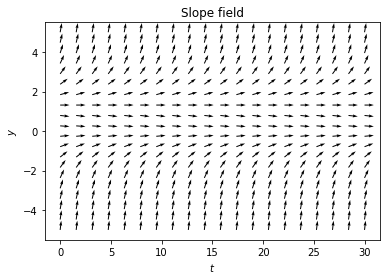

In [7]:
## plot slope field (ref: https://stackoverflow.com/questions/18832763/drawing-directions-fields)
# make image
fig = plt.figure(num=1)
ax=fig.add_subplot(111)
ax.set_title('Slope field')

## time spans from 0 to 30, total sample point is 20; y goes up to 1, total sample point is 20.
t = np.linspace(0,30,20)
y = np.linspace(-5,5,20)
T,Y = np.meshgrid(t,y)

## define slope field. At each point,the slope is given by (1,rhs).
U1 = 1.0
V1 = rhs(Y)

## normalize to make slope vectors with length 1.
norm = np.sqrt(U1**2 + V1**2)
U,V = U1/norm, V1/norm

## plot
ax.quiver(T, Y, U, V)

plt.xlabel(r"$t$")
plt.ylabel(r"$y$")
plt.show()

Modify the above code, and plot your own slope field, for $r=-0.3,\ N=1, a=0.4,\ b=2$. 

In [ ]:
## Your code here

Modify the above code, plot your own slope field, for $dy/dt=y(1-y)(1+y)$.

In [ ]:
## Your code here